# **Logistic Regression Model: Automobile Collision Fatalities**

**Objective**: Create logistic regression model that predicts probability of automobile collision resulting in fatality of driver. 



For this model, we will only look at collisions involving automobiles and evaluate the probability of fatality of the driver involved in the collision.


**Data Source**: The data is sourced from Toronto Police Public Safety Data Portal. https://data.torontopolice.on.ca/datasets/TorontoPS::ksi/about

This dataset includes all traffic collisions where a person was either killed or seriously injured from 2006-2022.



Dependent variable: INJURY


In [65]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
# Load data

ksi = pd.read_csv('KSI.csv')


In [67]:
ksi.shape

(18194, 57)

In [68]:
ksi.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,1
1,-8.844611e+06,5.412414e+06,3387731,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,2
2,-8.816480e+06,5.434843e+06,3388101,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,3
3,-8.829728e+06,5.419071e+06,3389067,893184.0,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,4
4,-8.816480e+06,5.434843e+06,3388102,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,5


In [69]:
ksi.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.819400e+04,1.819400e+04,1.819400e+04,1.326400e+04,18194.000000,18194.000000,1.733200e+04,18194.000000,18194.000000,827.000000,18194.000000
mean,-8.838345e+06,5.420748e+06,3.818870e+07,4.248444e+08,2012.934869,1362.615917,2.521028e+03,43.710459,-79.396201,29.073761,9097.500000
std,1.162533e+04,8.682160e+03,3.726463e+07,1.065503e+09,4.754258,630.816048,1.844803e+05,0.056369,0.104432,17.803627,5252.299734
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846591e+06,5.413242e+06,5.391370e+06,1.021229e+06,2009.000000,920.000000,7.000000e+00,43.661727,-79.470280,14.000000,4549.250000
50%,-8.838448e+06,5.419556e+06,7.644612e+06,1.197308e+06,2012.000000,1450.000000,1.300000e+01,43.702745,-79.397132,28.000000,9097.500000
75%,-8.829671e+06,5.427813e+06,8.078261e+07,1.365020e+06,2017.000000,1850.000000,2.200000e+01,43.756345,-79.318286,42.000000,13645.750000
max,-8.807929e+06,5.443099e+06,8.170606e+07,4.008024e+09,2022.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,18194.000000


In [70]:
ksi.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE',
       'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'ObjectId'],
      dtype='object')

# 1. Data Cleaning

## 1.1 Data Manipulation

In [71]:
# Manipulate dataframe where INVTYPE = Driver, VEHTYPE = Automobile, Station Wagon, AUTOMOBILE = Yes

data = ksi.loc[(ksi['INVTYPE'] == 'Driver') & (ksi['VEHTYPE'] == 'Automobile, Station Wagon') & (ksi['AUTOMOBILE'] == 'Yes')]

# Drop INVTYPE, VEHTYPE, AUTOMOBILE as they are insignificant to the model (all values are the same, var = 0)

data.drop((['INVTYPE','VEHTYPE','AUTOMOBILE']),inplace=True,axis=1)

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/3792178243.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop((['INVTYPE','VEHTYPE','AUTOMOBILE']),inplace=True,axis=1)


In [72]:
# Drop index, identifier, date, location columns since they are irrelevant to this model

data.drop(["X","Y","INDEX_","ACCNUM","YEAR","DATE","TIME","STREET1","STREET2","OFFSET","ROAD_CLASS","DISTRICT",
           "WARDNUM","LATITUDE","LONGITUDE","LOCCOORD","ACCLOC","FATAL_NO","INITDIR","HOOD_158","NEIGHBOURHOOD_158","HOOD_140",
           "NEIGHBOURHOOD_140","DIVISION","ObjectId"],inplace=True,axis=1)

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/1014289890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["X","Y","INDEX_","ACCNUM","YEAR","DATE","TIME","STREET1","STREET2","OFFSET","ROAD_CLASS","DISTRICT",


In [74]:
# Check for unique value counts in columns to determine possible dummy variables

featureValues={}
for d in data.columns.tolist():
    count=data[d].nunique()
    if count == 1:
        featureValues[d]=count 

# List of columns having 1 unique value

dummy_var = list(featureValues.keys())
print("The following columns are possible dummy variables : ",dummy_var)

The following columns are possible dummy variables :  ['PEDESTRIAN', 'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']


In [12]:
# Check for null value percentages for each column

data.isnull().mean()*100

TRAFFCTL           0.204583
VISIBILITY         0.109111
LIGHT              0.000000
RDSFCOND           0.163666
ACCLASS            0.013639
IMPACTYPE          0.040917
INVAGE             0.000000
INJURY             0.122750
MANOEUVER          0.040917
DRIVACT            1.254774
DRIVCOND           1.295690
PEDTYPE           99.959083
PEDACT           100.000000
PEDCOND          100.000000
CYCLISTYPE       100.000000
CYCACT           100.000000
CYCCOND          100.000000
PEDESTRIAN        66.052919
CYCLIST           90.998363
MOTORCYCLE        93.535188
TRUCK             97.490453
TRSN_CITY_VEH     98.486088
EMERG_VEH         99.918167
PASSENGER         65.752864
SPEEDING          84.860884
AG_DRIV           44.094381
REDLIGHT          90.070922
ALCOHOL           95.280960
DISABILITY        96.317512
dtype: float64

<Axes: >

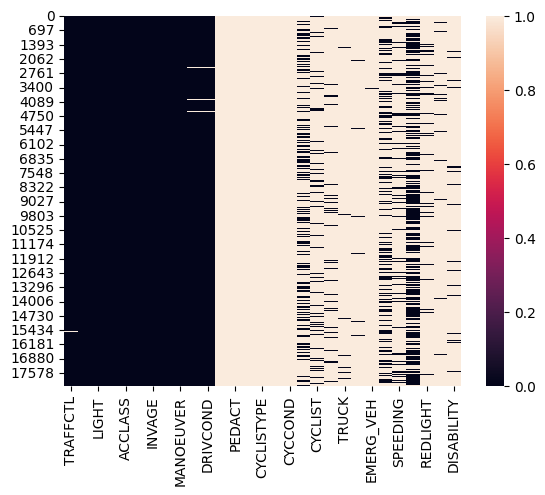

In [13]:
# Visualize null value percentages for each column

sns.heatmap(data.isna())


In [14]:
# We can drop PEDTYPE, PEDACT, PEDCOND, CYCLISTYPE, CYCACT, CYCCOND since they are almost entirely comprised of null values

data.drop((['PEDTYPE','PEDACT','PEDCOND','CYCLISTYPE','CYCACT','CYCCOND']),inplace=True,axis=1)

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/321467960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop((['PEDTYPE','PEDACT','PEDCOND','CYCLISTYPE','CYCACT','CYCCOND']),inplace=True,axis=1)


In [15]:
data.columns

Index(['TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVAGE', 'INJURY', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY'],
      dtype='object')

In [16]:
# Combine ['None', 'Minor', 'Minimal', 'Major'] as 0 and 'Fatal' as 1 in INJURY column

injury_list = ['None', 'Minor', 'Minimal', 'Major']

def adj_injury(inj):
    if inj in injury_list:
        return 0
    else:
        return 1
    
data['INJURY'] = data['INJURY'].apply(adj_injury)

# Check for results
counts = data['INJURY'].value_counts()

sorted_counts = counts.sort_values(ascending=False)

sorted_counts

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/1144111913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INJURY'] = data['INJURY'].apply(adj_injury)


0    7157
1     175
Name: INJURY, dtype: int64

## 1.2 Missing Data

In [17]:
# Categorical variables are 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE','INVAGE', 'INJURY', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'

# Fill missing data in categorical variables with mode

# Check for null values in categorical variables

null_counts = data.isnull().sum()

print(null_counts)

TRAFFCTL           15
VISIBILITY          8
LIGHT               0
RDSFCOND           12
ACCLASS             1
IMPACTYPE           3
INVAGE              0
INJURY              0
MANOEUVER           3
DRIVACT            92
DRIVCOND           95
PEDESTRIAN       4843
CYCLIST          6672
MOTORCYCLE       6858
TRUCK            7148
TRSN_CITY_VEH    7221
EMERG_VEH        7326
PASSENGER        4821
SPEEDING         6222
AG_DRIV          3233
REDLIGHT         6604
ALCOHOL          6986
DISABILITY       7062
dtype: int64


In [18]:
# Check for mode in 'VISIBILITY'

data['VISIBILITY'].mode()

0    Clear
Name: VISIBILITY, dtype: object

In [19]:
# Fill missing data in 'VISIBILITY' with mode

data['VISIBILITY']=data['VISIBILITY'].fillna('Clear')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/518645461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VISIBILITY']=data['VISIBILITY'].fillna('Clear')


In [20]:
# Check for mode in 'RDSFCOND'

data['RDSFCOND'].mode()

0    Dry
Name: RDSFCOND, dtype: object

In [21]:
# Fill missing data in 'RDSFCOND' with mode

data['RDSFCOND']=data['RDSFCOND'].fillna('Dry')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/1300094663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RDSFCOND']=data['RDSFCOND'].fillna('Dry')


In [22]:
# Check for mode in 'INJURY'

data['INJURY'].mode()

0    0
Name: INJURY, dtype: int64

In [23]:
# Fill missing data in 'INJURY' with mode

data['INJURY']=data['INJURY'].fillna('None')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/804827720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INJURY']=data['INJURY'].fillna('None')


In [24]:
# Check for mode in 'DRIVCOND'

data['DRIVCOND'].mode()

0    Normal
Name: DRIVCOND, dtype: object

In [25]:
# Fill missing data in 'DRIVCOND' with mode

data['DRIVCOND']=data['DRIVCOND'].fillna('Normal')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/3933667500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DRIVCOND']=data['DRIVCOND'].fillna('Normal')


In [26]:
# Check for mode in 'DRIVACT'

data['DRIVACT'].mode()

0    Driving Properly
Name: DRIVACT, dtype: object

In [27]:
# Fill missing data in 'DRIVACT' with mode

data['DRIVACT']=data['DRIVACT'].fillna('Driving Properly')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/3069970868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DRIVACT']=data['DRIVACT'].fillna('Driving Properly')


In [28]:
# Check for mode in 'TRAFFCTL'

data['TRAFFCTL'].mode()

0    No Control
Name: TRAFFCTL, dtype: object

In [29]:
# Fill missing data in 'TRAFFCTL' with mode 

data['TRAFFCTL'] = data['TRAFFCTL'].fillna('No Control')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/1185852277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TRAFFCTL'] = data['TRAFFCTL'].fillna('No Control')


In [30]:
# Check for mode in 'IMPACTYPE' mode

data['IMPACTYPE'].mode()

0    Pedestrian Collisions
Name: IMPACTYPE, dtype: object

In [31]:
# Fill missing data in 'IMPACTYPE' with mode

data['IMPACTYPE'] = data['IMPACTYPE'].fillna('Pedestrian Collisions')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/1643993510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IMPACTYPE'] = data['IMPACTYPE'].fillna('Pedestrian Collisions')


In [32]:
# Check for mode in 'MANOEUVER'

data['MANOEUVER'].mode()

0    Going Ahead
Name: MANOEUVER, dtype: object

In [33]:
# Fill missing data in 'MANOEUVER' with mode

data['MANOEUVER'] = data['MANOEUVER'].fillna('Going Ahead')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/4074955780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MANOEUVER'] = data['MANOEUVER'].fillna('Going Ahead')


In [34]:
# Check for mode in 'ACCLASS'

data["ACCLASS"].mode()

0    Non-Fatal Injury
Name: ACCLASS, dtype: object

In [35]:
# Fill missing data in 'ACCLASS' with mode

data['ACCLASS'] = data['ACCLASS'].fillna('Non-Fatal Injury')

/var/folders/2w/_prsgq8d47xgrl3qqr0nfx9m0000gn/T/ipykernel_8188/522772329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ACCLASS'] = data['ACCLASS'].fillna('Non-Fatal Injury')


In [36]:
# Check to see if missing data is filled

null_counts = data.isnull().sum()

print(null_counts)

TRAFFCTL            0
VISIBILITY          0
LIGHT               0
RDSFCOND            0
ACCLASS             0
IMPACTYPE           0
INVAGE              0
INJURY              0
MANOEUVER           0
DRIVACT             0
DRIVCOND            0
PEDESTRIAN       4843
CYCLIST          6672
MOTORCYCLE       6858
TRUCK            7148
TRSN_CITY_VEH    7221
EMERG_VEH        7326
PASSENGER        4821
SPEEDING         6222
AG_DRIV          3233
REDLIGHT         6604
ALCOHOL          6986
DISABILITY       7062
dtype: int64


# 2. Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

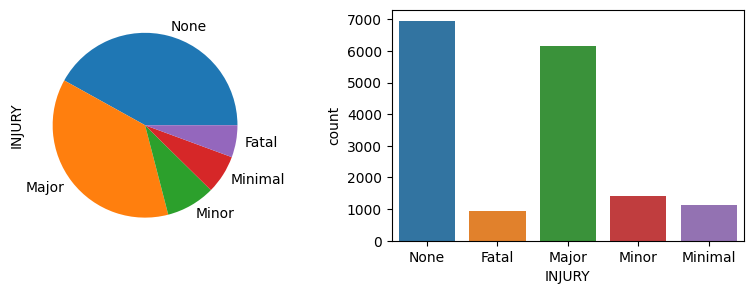

In [37]:
# Distribution of dependent variable INJURY in unaltered dataset 'ksi'

fig = plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
a = ksi['INJURY'].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=ksi['INJURY'])
plt.tight_layout
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

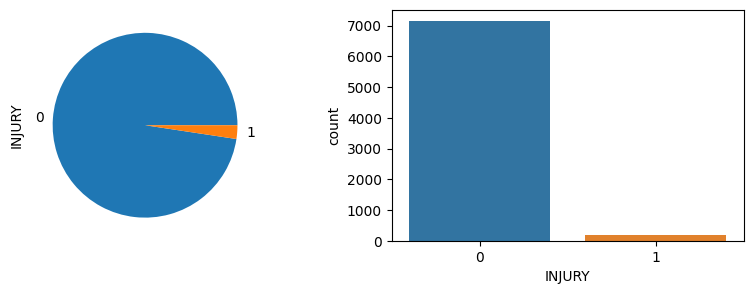

In [38]:
# Distribution of dependent variable INJURY in model dataset 'data'

fig = plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
a = data['INJURY'].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data['INJURY'])
plt.tight_layout
plt.show

Text(0, 0.5, 'Count')

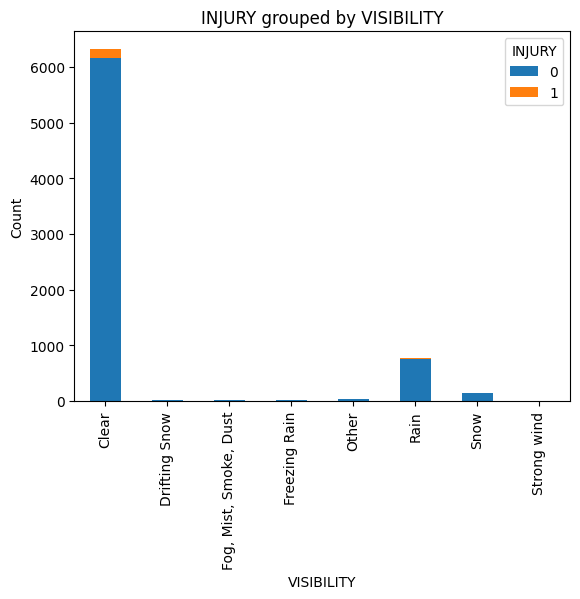

<Figure size 1000x300 with 0 Axes>

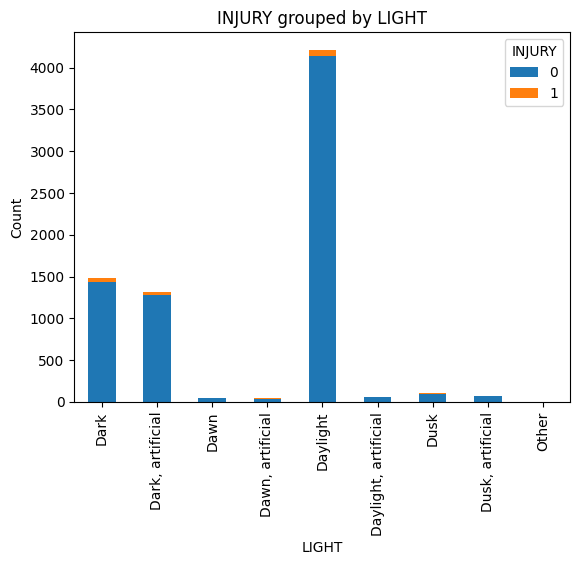

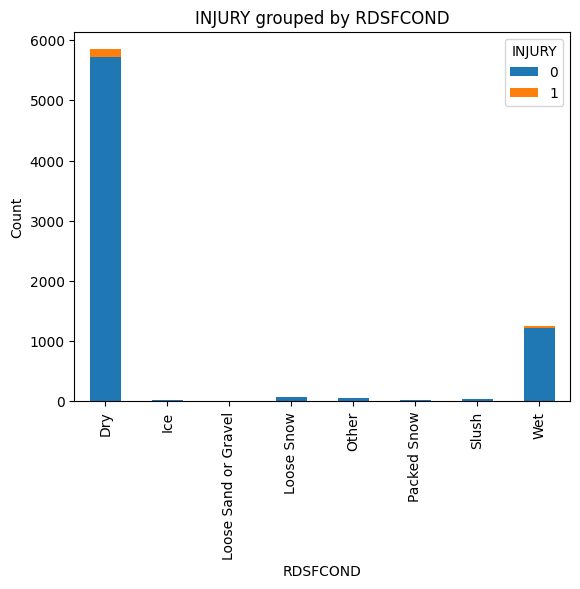

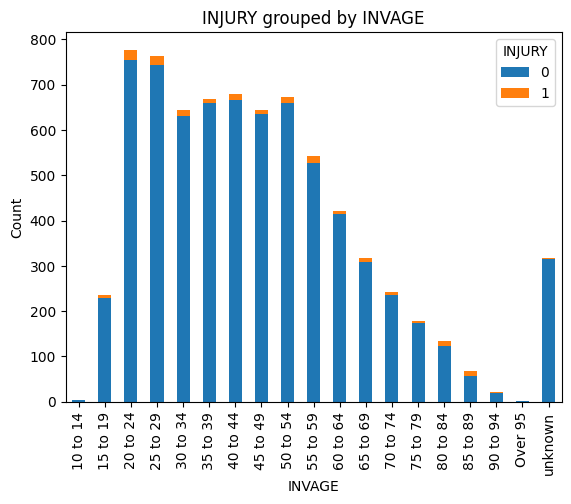

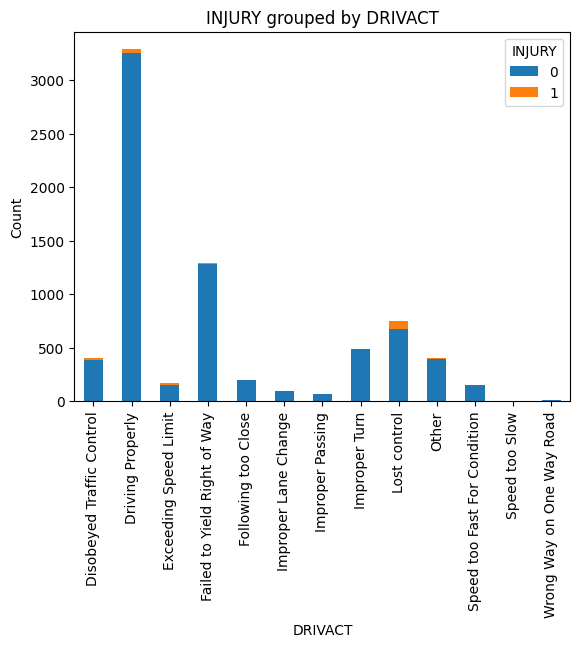

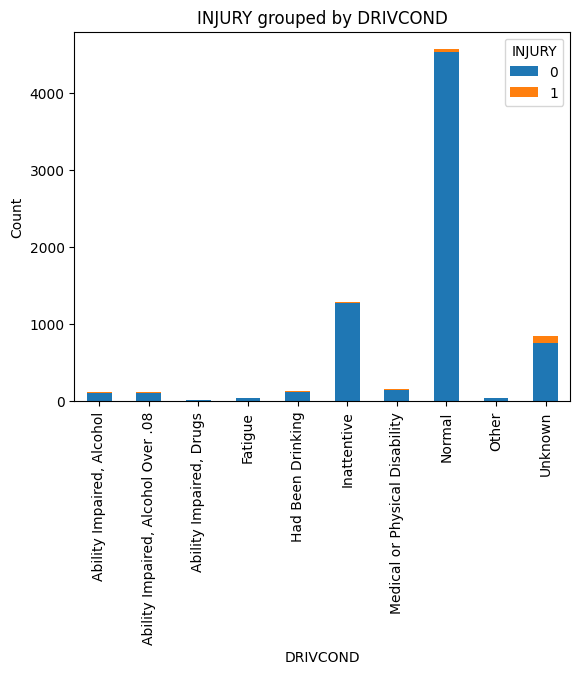

In [39]:
# There is clear class imbalance: Fatal class is significantly smaller than non-fatal class

# INJURY vs. other variables (VISIBILITY, LIGHT, RDSFCOND, INVAGE, DRIVACT, DRIVCOND)

# Group data 
grouped1 = data.groupby(['VISIBILITY', 'INJURY']).size().unstack()
grouped2 = data.groupby(['LIGHT', 'INJURY']).size().unstack()
grouped3 = data.groupby(['RDSFCOND', 'INJURY']).size().unstack()
grouped4 = data.groupby(['INVAGE', 'INJURY']).size().unstack()
grouped5 = data.groupby(['DRIVACT', 'INJURY']).size().unstack()
grouped6 = data.groupby(['DRIVCOND', 'INJURY']).size().unstack()

grouped1.plot(kind='bar', stacked=True)
plt.title('INJURY grouped by VISIBILITY')
plt.xlabel('VISIBILITY')
plt.ylabel('Count')
plt.figure(figsize=(10,3))

grouped2.plot(kind='bar', stacked=True)
plt.title('INJURY grouped by LIGHT')
plt.xlabel('LIGHT')
plt.ylabel('Count')

grouped3.plot(kind='bar', stacked=True)
plt.title('INJURY grouped by RDSFCOND')
plt.xlabel('RDSFCOND')
plt.ylabel('Count')

grouped4.plot(kind='bar', stacked=True)
plt.title('INJURY grouped by INVAGE')
plt.xlabel('INVAGE')
plt.ylabel('Count')

grouped5.plot(kind='bar', stacked=True)
plt.title('INJURY grouped by DRIVACT')
plt.xlabel('DRIVACT')
plt.ylabel('Count')

grouped6.plot(kind='bar', stacked=True)
plt.title('INJURY grouped by DRIVCOND')
plt.xlabel('DRIVCOND')
plt.ylabel('Count')

# 3. Data Modelling

## 3.1 Dummy Variables

In [40]:
# Converting categorical variables into dummy variables

data = pd.get_dummies(data, columns=['TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVAGE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY'], drop_first=True)

data.columns

Index(['INJURY', 'TRAFFCTL_Pedestrian Crossover', 'TRAFFCTL_Police Control',
       'TRAFFCTL_School Guard', 'TRAFFCTL_Stop Sign',
       'TRAFFCTL_Streetcar (Stop for)', 'TRAFFCTL_Traffic Controller',
       'TRAFFCTL_Traffic Signal', 'TRAFFCTL_Yield Sign',
       'VISIBILITY_Drifting Snow', 'VISIBILITY_Fog, Mist, Smoke, Dust',
       'VISIBILITY_Freezing Rain', 'VISIBILITY_Other', 'VISIBILITY_Rain',
       'VISIBILITY_Snow', 'VISIBILITY_Strong wind', 'LIGHT_Dark, artificial',
       'LIGHT_Dawn', 'LIGHT_Dawn, artificial', 'LIGHT_Daylight',
       'LIGHT_Daylight, artificial', 'LIGHT_Dusk', 'LIGHT_Dusk, artificial',
       'LIGHT_Other', 'RDSFCOND_Ice', 'RDSFCOND_Loose Sand or Gravel',
       'RDSFCOND_Loose Snow', 'RDSFCOND_Other', 'RDSFCOND_Packed Snow',
       'RDSFCOND_Slush', 'RDSFCOND_Wet', 'ACCLASS_Non-Fatal Injury',
       'ACCLASS_Property Damage Only', 'IMPACTYPE_Approaching',
       'IMPACTYPE_Cyclist Collisions', 'IMPACTYPE_Other',
       'IMPACTYPE_Pedestrian Collisions',

## 3.2 Split-Train Test

In [41]:
# Import train-test split method

from sklearn.model_selection import train_test_split


In [42]:
# Train-test split

random_seed = np.random.randint(1,999)
df_train, df_test = train_test_split(data, test_size=0.2, random_state=random_seed, stratify=data['INJURY'])

print(df_train.shape)
print(df_test.shape)
print()
print(df_train['INJURY'].value_counts(normalize=True))
print()
print(df_test['INJURY'].value_counts(normalize=True))

(5865, 96)
(1467, 96)

0    0.97613
1    0.02387
Name: INJURY, dtype: float64

0    0.976142
1    0.023858
Name: INJURY, dtype: float64


In [43]:
# Split data into dependent variable (y) and independent variables (x)

y = data.pop('INJURY')
x = data

# Split x and y using train-test split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.8)

# Get shape of train and test data

print("train size x : ",x_train.shape)
print("train size y : ",y_train.shape)
print("test size x : ",x_test.shape)
print("test size y : ",y_test.shape)

train size x :  (5865, 95)
train size y :  (5865,)
test size x :  (1467, 95)
test size y :  (1467,)


In [44]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## 3.3 Logistic Regression

In [45]:
# Class imbalance

# Check for distribution of labels

y_train.value_counts(normalize=True)



0    0.976641
1    0.023359
Name: INJURY, dtype: float64

In [46]:
# Adjust for class imbalance with class weights

# Import library

from sklearn.linear_model import LogisticRegression

# Add class weights due to class imbalance 

lr_basemodel =LogisticRegression(class_weight={0:0.1,1:0.9})

# Train model to learn relationships between input and output variables

lr_basemodel.fit(x_train,y_train)



LogisticRegression(class_weight={0: 0.1, 1: 0.9})

# 4. Model Evaluation

In [47]:
# We will evaluate the base model by using the f1 score since we have a class imbalance within our dataset

from sklearn.metrics import f1_score

# Predicted probability of the logistic regression 

test_prob = lr_basemodel.predict_proba(x_test)[:,1]

# We will predict the test dataset labels by choosing the class with the highest probability

test_pred = lr_basemodel.predict(x_test)

print("f1 score for base model is : " , f1_score(y_test,test_pred))

f1 score for base model is :  0.5333333333333332


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,test_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,1390,39
Actual Yes,10,28


In [55]:
print('\nClassification Report')
print(classification_report(y_test, test_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1429
           1       0.42      0.74      0.53        38

    accuracy                           0.97      1467
   macro avg       0.71      0.85      0.76      1467
weighted avg       0.98      0.97      0.97      1467



## Classification Report Interpretation

Precision: Out of all the instances where the model predicted driver fatality, only 42 percent of the predictions were correct. 

Recall: Out of all the collisions that resulted in driver fatality, the model successfully found 74 percent of this outcome. 

F1-score: The F1 score is the harmonic mean of precision and recall. F1-score = 0.53

Support: In the test dataset, there were 1429 drivers that had non-fatal injurys/no injuries and 38 driver fatalities.

Accuracy: Of the total number of predictions that were made, 97 percent were correct. 

#### The dataset suffers from class imbalance, therefore the accuracy metric is not an appropriate method of evaluating the model as it does not account for the imbalanced data. Instead, we can use the F1-score to evaluate the model. Since the F1-score is a combination of precision and recall metrics, the low precision and high recall of this model results in a F1-score of 0.53, thus we can conclude that this model is adequate. This model can be improved by by including the omitted features, implementing hyperparameter optimization, and increasing the sample of fatalities to account for class imbalance.